In [1]:
import datetime
import pandas as pd

pd.set_option('display.max_columns', None)
accidents = pd.read_pickle('accident.pickle', compression='gzip')

# drop accidents with no reported date
accidents = accidents.dropna(subset=['date'])
derailments = pd.DataFrame(accidents[accidents['accidenttype'] == 'Derailment'])
accidents = None

In [2]:
# format data and index
derailments['date'] = derailments['date'].apply(lambda x: datetime.datetime.fromisoformat(str(x)))
derailments['hazmatcars'] = derailments['hazmatcars'].apply(lambda x: int(x))
derailments['hazmatreleasedcars'] = derailments['hazmatreleasedcars'].apply(lambda x: int(x))
derailments['derailedemptyfreightcars'] = derailments['derailedemptyfreightcars'].apply(lambda x: int(x))
derailments['derailedloadedfreightcars'] = derailments['derailedloadedfreightcars'].apply(lambda x: int(x))
derailments.index = derailments['date']

In [3]:
derailments[:100]

,reportingrailroadcode,reportingrailroadname,report_year,incidentnumber,url,accidentyear,accidentmonth,maintenancerailroadcode,maintenancerailroadname,maintenanceaccidentnumber,maintenanceaccidentyear,maintenanceaccidentmonth,day,date,time,accident_type_code,accidenttype,hazmatcars,hazmatcarsdamaged,hazmatreleasedcars,personsevacuated,subdivision,station,milepost,statecode,stateabbr,statename,countycode,countyname,district,temperature,visibilitycode,visibility,weather_condition_code,weathercondition,track_type_code,tracktype,trackname,trackclass,trackdensity,train_direction_code,traindirection,equipment_type_code,equipmenttype,equipmentattended,trainnumber,trainspeed,recordedestimatedspeed,maximumspeed,grosstonnage,signalization_code,signalization,methodofoperation,adjunct_1,adjunctcode1,remote_control_locomotive_code,remotecontrollocomotive,firstcarinitials,firstcarnumber,firstcarposition,firstcarloaded,causingcarposition,positivealcoholtests,positivedrugtests,passengerstransported,headendlocomotives,midtrainmanuallocomotives,midtrainremotelocomotives,rearendmanuallocomotives,rearendremotelocomotives,derailedheadendlocomotives,derailedmidtrainmanuallo,derailedmidtrainremotelo,derailedrearendmanualloc,derailedrearendremoteloc,loadedfreightcars,loadedpassengercars,emptyfreightcars,emptypassengercars,cabooses,derailedloadedfreightcars,derailedloadedpassengercars,derailedemptyfreightcars,derailedemptypassengercars,derailedcabooses,equipmentdamagecost,trackdamagecost,totaldamagecost,primaryaccidentcausecode,primaryaccidentcause,accidentcausecode,accidentcause,engineersonduty,firemenonduty,conductorsonduty,brakemenonduty,hoursengineersonduty,minutesengineersonduty,hoursconductorsonduty,minutesconductorsonduty,railroademployeeskilled,railroademployeesinjured,passengerskilled,passengersinjured,otherskilled,othersinjured,personskilledforreportin,personsinjuredforreporti,totalpersonskilled,totalpersonsinjured,totalkilledform54,totalinjuredform54,specialstudy1,specialstudy2,latitude,longitude,narrative,jointtracktype,jointtrackclass,classcode,class,jointcd,incidentkey,reportkey,reporting_railroad_class,reporting_railroad_smt_grouping,reporting_parent_railroad_company_code,reporting_parent_railroad_company_name,reporting_railroad_holding_company,maintenance_railroad_class,maintenance_railroad_smt_grouping,maintenance_parent_railroad_company_code,maintenance_parent_railroad_company_name,maintenance_railroad_holding_company,divisioncode,division,method_of_operation_code,gxid,causingcarloaded,causingcarinitials,causingcarnumber,maintenance_railroad_company_grouping,contributingaccidentcausecode,contributingaccidentcause,adjunct_2,adjunctcode2,reporting_railroad_company_grouping,otherrailroadcode,otherrailroadname,otheraccidentnumber,accidentyearother,accidentmonthother,other_railroad_class,other_parent_railroad_company_code,other_parent_railroad_company_name,other_railroad_holding_company,other_railroad_company_grouping,other_railroad_smt_grouping,adjunct_3,adjunctcode3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-09,NS,Norfolk Southern Railway Company,2016,120068,{'url': 'https://safetydata.fra.dot.gov/Office...,16,04,NS,Norfolk Southern Railway Company,120068,16,04,09,2016-04-09,5:30 AM,01,Derailment,0,0,0,0,GEORGIA,MACON,242.00,13,GA,GEORGIA,21,BIBB,3,60.0,1,Dawn,1,Clear,2,Yard,EAST PULLBACK,1,0000,1,North,7,Yard/switching,Yes,GM44,6,Estimated,6,0,2,Not Signaled,Other Than Main Track,K,Restricted Speed or Equivalent,0,Not a remotely controlled operation,TILX,150060,13,No,0,0,0,No,3,0,0,0,0,0,0,0,0,0,30,0,20,0,0,0,0,4,0,0,36200,0,41720,H607,Failure to comply with restricted speed or its...,H607,Failure to comply with restricted speed or its...,1,0,1,0,6,40,6,40,0,0,0,0,0,0,0,0,0,0,0,0,OTH,000-000-000,32.813657999999997,-83.622784999999993,WHILE PULLING NORTH THE GM42 FAILED TO COMPLY ...,Yard,1,CL,CL,3,NS12006820

In [4]:
hazmat = derailments[derailments['hazmatreleasedcars'] > 0]
no_hazmat_released = derailments[(derailments['hazmatcars'] > 0) & (derailments['hazmatreleasedcars'] == 0)]
no_hazmat = derailments[derailments['hazmatcars'] == 0]

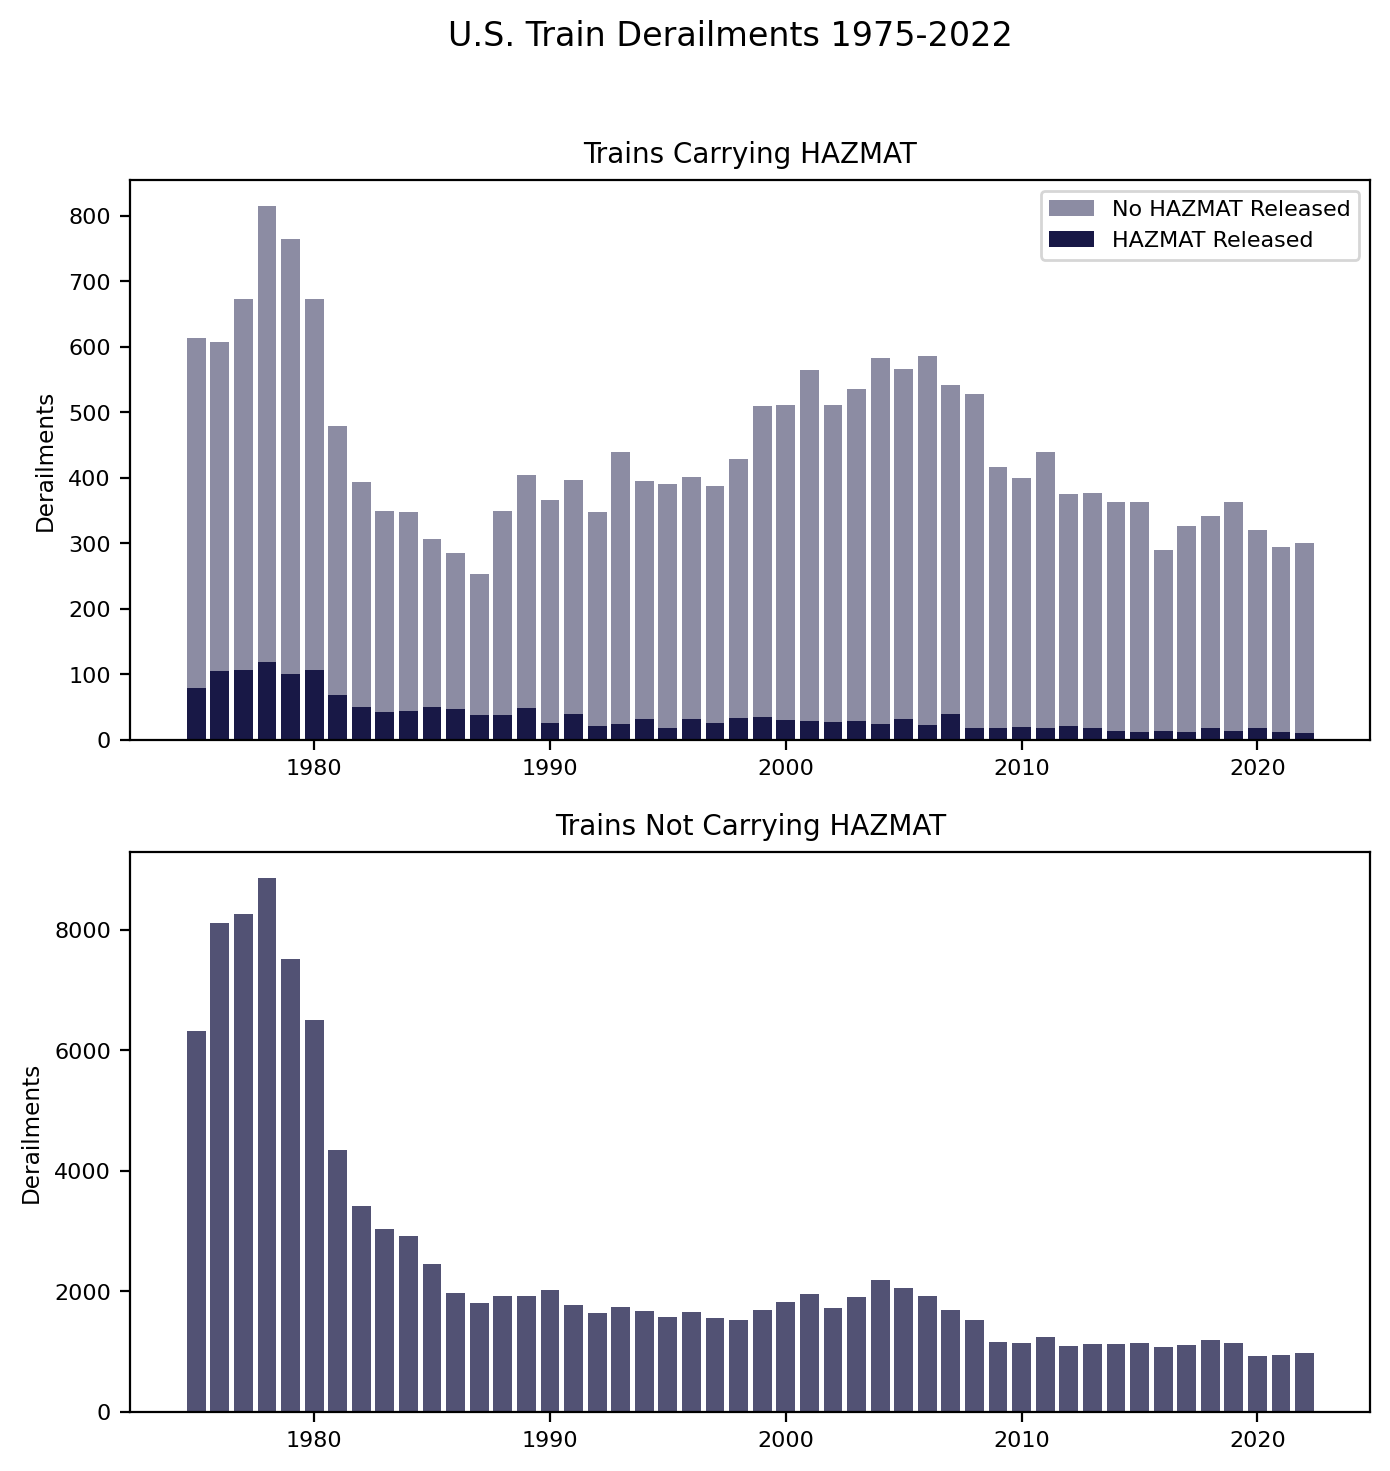

In [5]:
import matplotlib.pyplot as plt

fig, (h, n) = plt.subplots(2,1, figsize=(8,8), dpi=200)
years = range(1975,2023)
h.bar(years, no_hazmat_released.groupby(pd.Grouper(freq='Y')).count()['date'],
      bottom=hazmat.groupby(pd.Grouper(freq='Y')).count()['date'], color = '#8C8CA3', label="No HAZMAT Released")
h.bar(years, hazmat.groupby(pd.Grouper(freq='Y')).count()['date'], color = '#181846', label="HAZMAT Released")
h.set_ylabel('Derailments', fontsize='small')
h.legend(loc='upper right', fontsize=8)
h.set_title('Trains Carrying HAZMAT', fontsize=10)
h.tick_params(axis='both', which='major', labelsize=8)
n.bar(years, no_hazmat.groupby(pd.Grouper(freq='Y')).count()['date'], color='#525274')
n.set_ylabel('Derailments', fontsize='small')
n.set_title('Trains Not Carrying HAZMAT', fontsize=10)
n.tick_params(axis='both', which='major', labelsize=8)
fig.suptitle('U.S. Train Derailments 1975-2022', fontsize=12)
fig.savefig('derailments.png')

In [6]:
# find average statistics since 1990
derailments_1990 = derailments[derailments['date'].dt.year >= 1990]

In [7]:
start_date = derailments_1990['date'].min()
end_date = derailments_1990['date'].max()
delta = end_date - start_date
print(start_date)
print(end_date)
# calculate average derailments per day since 1990
derailments_1990['date'].count() / delta.days

1990-01-01 00:00:00
2022-12-31 00:00:00


5.215565881181547

In [8]:
# calculate average hazmat releases per day
derailments_1990[derailments_1990['hazmatreleasedcars'] >0]['date'].count() / delta.days

0.061400597411218054

In [9]:
# calculate average number of train cars releasing HAZMAT in a derailment
derailments_1990[derailments_1990['hazmatreleasedcars'] >0]['hazmatreleasedcars'].sum() / derailments_1990[derailments_1990['hazmatreleasedcars'] >0]['date'].count()

2.0108108108108107

In [15]:
# calculate states with most and least number of derailed freight cars per year
states = derailments_1990[['stateabbr','derailedemptyfreightcars','derailedloadedfreightcars']].groupby('stateabbr').sum()
states['average_cars_year'] = (states['derailedloadedfreightcars'] + states['derailedemptyfreightcars']) / (delta.days / 365)
states.sort_values('average_cars_year')

,derailedemptyfreightcars,derailedloadedfreightcars,average_cars_year
stateabbr,,,
RI,2,8,0.302854
NH,19,104,3.725108
DC,32,96,3.876535
AK,96,181,8.389064
DE,37,298,10.145619
CT,77,267,10.418188
VT,85,287,11.266180
ME,325,662,29.891719
MA,350,868,36.887654


In [25]:
# calculate railroads with most and least amount of hazmat releasing cars per year
hazmat_releases = derailments_1990[derailments_1990['hazmatreleasedcars'] > 0][['reporting_parent_railroad_company_name', 'hazmatreleasedcars']].groupby('reporting_parent_railroad_company_name')
print(hazmat_releases.sum()['hazmatreleasedcars'].nlargest(5))

reporting_parent_railroad_company_name
BNSF Railway Company                 327
Union Pacific Railroad Company       319
CSX Transportation                   213
Norfolk Southern Railway Company     190
Canadian National - North America    109
Name: hazmatreleasedcars, dtype: int64


In [26]:
print(hazmat_releases.count()['hazmatreleasedcars'].nlargest(5))

reporting_parent_railroad_company_name
Union Pacific Railroad Company       176
BNSF Railway Company                 156
CSX Transportation                   115
Norfolk Southern Railway Company      90
Canadian National - North America     47
Name: hazmatreleasedcars, dtype: int64
